Day 5: Decision Trees

Objective of the day
Learn how decision trees split data into regions, handle non-linear boundaries, and compare them with logistic regression.

Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       0.88      0.54      0.67        13

    accuracy                           0.77        30
   macro avg       0.80      0.74      0.74        30
weighted avg       0.79      0.77      0.75        30



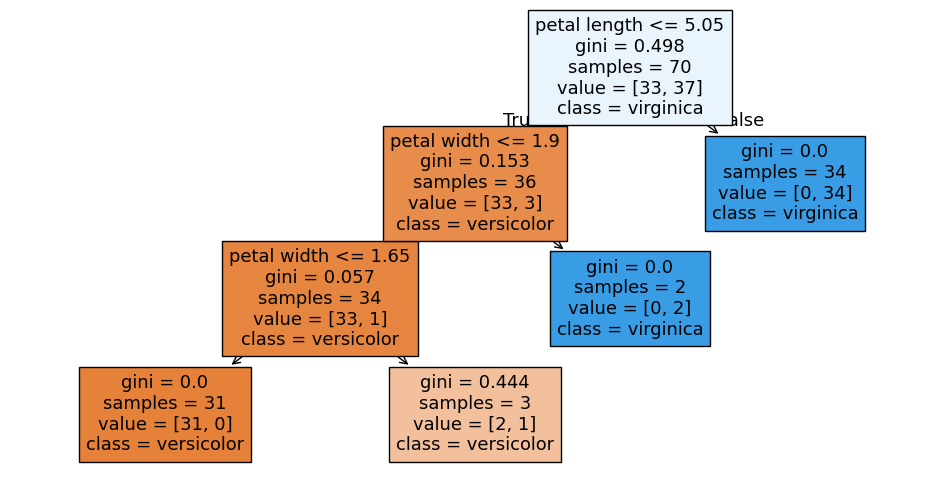

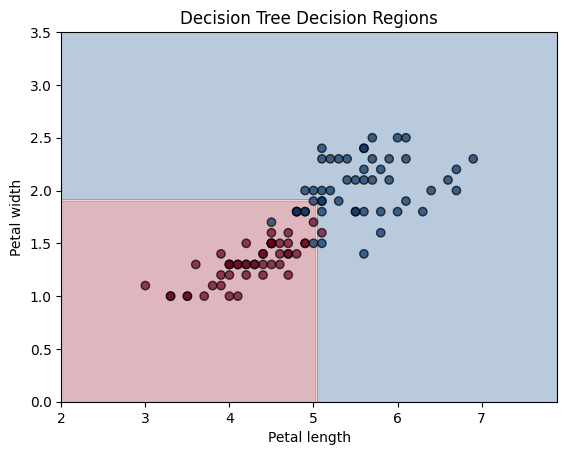

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data[:, 2:4]   # use petal length & petal width (better features)
y = (iris.target == 1).astype(int) | (iris.target == 2).astype(int)  # filter to versicolor vs virginica
y = iris.target[iris.target != 0]
X = iris.data[iris.target != 0, 2:4]  # only petal features, versicolor & virginica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Decision tree

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Visualize Tree

plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=["petal length", "petal width"], class_names=["versicolor","virginica"], filled=True)
plt.show()

# Plot decision regions

# Grid
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="RdBu", alpha=0.7)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Decision Tree Decision Regions")
plt.show()



📊 Exercise of the Day

What’s the accuracy on test data? Compare it to logistic regression’s ~0.73 yesterday.

Look at the decision boundary plot — is it straight like logistic regression or more “boxy”? Why?

From the tree diagram, which feature (petal length vs petal width) is more important?

1) Accuracy: 0.76. Slightly better than yesterday.

2) The decsion plot is more boxy. Data is split into rectangular regions. Allows to handle more comples non-linear data

3) Petal length is more important as it is in the root node

🌟 Mini-Challenge

Train one tree with max_depth=2 and another with max_depth=None (fully grown).

Compare their accuracies on train and test sets.
👉 Which one overfits? Which one generalizes better?

Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       0.88      0.54      0.67        13

    accuracy                           0.77        30
   macro avg       0.80      0.74      0.74        30
weighted avg       0.79      0.77      0.75        30



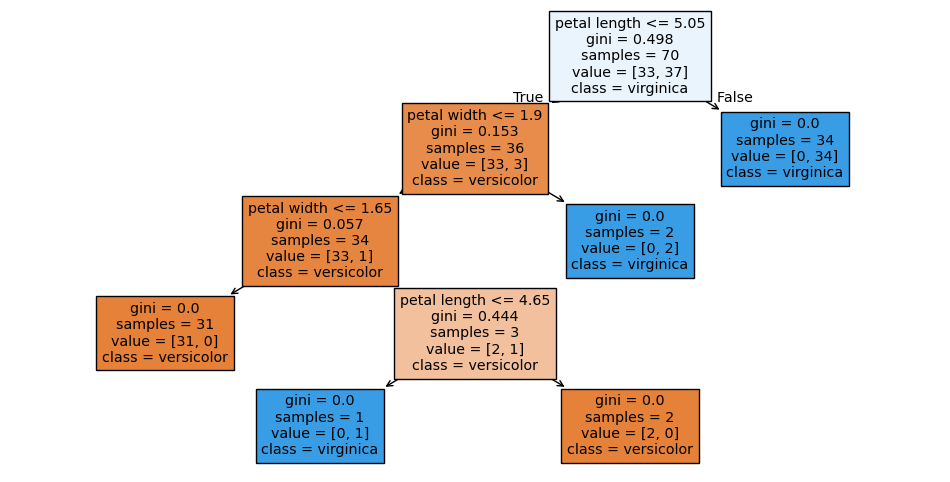

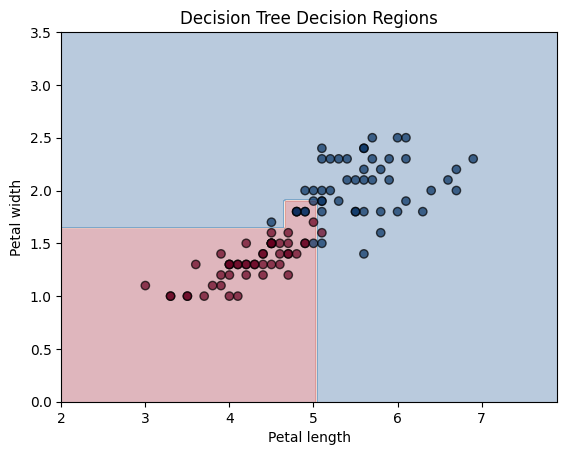

In [3]:
tree = DecisionTreeClassifier(max_depth=None, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Visualize Tree

plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=["petal length", "petal width"], class_names=["versicolor","virginica"], filled=True)
plt.show()

# Plot decision regions

# Grid
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="RdBu")
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap="RdBu", alpha=0.7)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Decision Tree Decision Regions")
plt.show()


Tree with no max depth has exactly the same accuracy as tree with max depth 3. This data set is not goog enough to represent this comparison. However, trees with higher depth tend to overfitt data.